In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('heart.csv')

In [4]:
df = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (872, 12)
Unseen Data For Predictions: (46, 12)


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up,0
1,39,M,ASY,110,280,0,Normal,150,N,0.0,Flat,1
2,59,M,ASY,140,274,0,Normal,154,Y,2.0,Flat,0
3,55,M,ASY,145,248,0,Normal,96,Y,2.0,Flat,1
4,59,M,ASY,122,233,0,Normal,117,Y,1.3,Down,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             872 non-null    int64  
 1   Sex             872 non-null    object 
 2   ChestPainType   872 non-null    object 
 3   RestingBP       872 non-null    int64  
 4   Cholesterol     872 non-null    int64  
 5   FastingBS       872 non-null    int64  
 6   RestingECG      872 non-null    object 
 7   MaxHR           872 non-null    int64  
 8   ExerciseAngina  872 non-null    object 
 9   Oldpeak         872 non-null    float64
 10  ST_Slope        872 non-null    object 
 11  HeartDisease    872 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 81.9+ KB


In [7]:
!pip install pycaret
!pip install shap

     |████████████████████████████████| 318 kB 23.8 MB/s 
     |████████████████████████████████| 16.5 MB 268 kB/s 
     |████████████████████████████████| 6.8 MB 52.7 MB/s 
     |████████████████████████████████| 167 kB 61.5 MB/s 
     |████████████████████████████████| 2.0 MB 50.2 MB/s 
     |████████████████████████████████| 1.7 MB 58.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 114 kB 56.8 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 1.3 MB 53.8 MB/s 
     |████████████████████████████████| 261 kB 50.4 MB/s 
     |████████████████████████████████| 10.9 MB 36.8 MB/s 
     |████████████████████████████████| 3.1 MB 53.0 MB/s 
     |████████████████████████████████| 102 kB 11.6 MB/s 
     |████████████████

     |████████████████████████████████| 564 kB 25.9 MB/s 


In [8]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(df[column_name].unique())

[61 39 59 55 62 50 52 51 48 49 72 58 44 54 46 36 65 57 63 67 43 38 53 47
 40 66 56 28 74 64 69 75 37 31 35 60 45 71 76 29 32 41 42 70 34 68 77 33
 30 73]
['F' 'M']
['ATA' 'ASY' 'NAP' 'TA']
[140 110 145 122 150 124 160 130 108 138 131 120 129 106 128 146 132 200
  96 152 100 190 125 118 142 148 123 105 137 155 133 144 134 180 135 115
 112 170 102 165 156 141 164 143 158 104  80  95 126 117 136 113 172  92
  98 139 114 185 178 101  94 154 174 116 127   0 192]
[298 280 274 248 233 244 160 216 164 180 204 152 261 325 196 263 297 254
 123 270   0 169 218 353 201 243 209 275 241 198 305 235 277 177 246 266
 175 249 289 259 223 284 207 132  85 288 212 458 227 182 220 224 186 276
 392 252 228 184 131 203 282 310 267 269 200 187 208 171 240 260 167 273
 221 281 217 308 183 255 295 226 564 215 222 250 161 197 129 242 247 258
 299 213 193 225 202 214 230 256 341 190 264 283 236 306 219 268 318 285
 315 330 342 245 279 237 159 179 360 234 166 176 211 170 188 292 238 290
 113 185 257 194 404 210 41

In [9]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [10]:
clf3 = setup(data=df, target= 'HeartDisease',normalize=True, normalize_method ='minmax', session_id=123)

,Description,Value
0,session_id,123
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(872, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8623,0.9153,0.8935,0.8648,0.8769,0.7205,0.7259,0.464
gbc,Gradient Boosting Classifier,0.8607,0.9240,0.8876,0.8650,0.8742,0.7178,0.7225,0.122
ridge,Ridge Classifier,0.8557,0.0000,0.8788,0.8633,0.8700,0.7078,0.7105,0.013
lda,Linear Discriminant Analysis,0.8557,0.9183,0.8817,0.8612,0.8704,0.7076,0.7103,0.015
lightgbm,Light Gradient Boosting Machine,0.8541,0.9264,0.8789,0.8621,0.8673,0.7050,0.7117,0.085
lr,Logistic Regression,0.8508,0.9184,0.8729,0.8604,0.8655,0.6979,0.7007,0.467
ada,Ada Boost Classifier,0.8492,0.8934,0.8611,0.8670,0.8621,0.6955,0.6992,0.110
rf,Random Forest Classifier,0.8459,0.9266,0.8846,0.8456,0.8629,0.6867,0.6918,0.517
nb,Naive Bayes,0.8443,0.9137,0.8640,0.8573,0.8592,0.6848,0.6882,0.015
svm,SVM - Linear Kernel,0.8410,0.0000,0.8283,0.8802,0.8502,0.6808,0.6869,0.014


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.7869  0.7859  0.7941  0.8182  0.8060  0.5697  0.5700
       1       0.7541  0.7451  0.8235  0.7568  0.7887  0.4959  0.4984
       2       0.7541  0.7375  0.8824  0.7317  0.8000  0.4880  0.5025
       3       0.8361  0.8377  0.8235  0.8750  0.8485  0.6703  0.6717
       4       0.7705  0.7751  0.7353  0.8333  0.7812  0.5418  0.5465
       5       0.7377  0.7304  0.7941  0.7500  0.7714  0.4643  0.4654
       6       0.8852  0.8856  0.8824  0.9091  0.8955  0.7683  0.7687
       7       0.7213  0.7271  0.6765  0.7931  0.7302  0.4458  0.4518
       8       0.7541  0.7592  0.6970  0.8214  0.7541  0.5115  0.5184
       9       0.6885  0.6851  0.7273  0.7059  0.7164  0.3711  0.3713
       Mean    0.7689  0.7669  0.7836  0.7994  0.7892  0.5327  0.5365
       Std     0.0536  0.0553  0.0688  0.0611  0.0506  0.1086  0.1077
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [14]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [15]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8197  0.8671  0.8235  0.8485  0.8358  0.6359  0.6363
       1       0.7869  0.8938  0.7941  0.8182  0.8060  0.5697  0.5700
       2       0.8197  0.8208  0.9118  0.7949  0.8493  0.6274  0.6366
       3       0.8525  0.8769  0.9412  0.8205  0.8767  0.6952  0.7054
       4       0.8197  0.8638  0.8235  0.8485  0.8358  0.6359  0.6363
       5       0.8689  0.8617  0.9118  0.8611  0.8857  0.7322  0.7338
       6       0.8361  0.9178  0.8529  0.8529  0.8529  0.6678  0.6678
       7       0.8033  0.8595  0.7647  0.8667  0.8125  0.6073  0.6126
       8       0.8033  0.8577  0.7879  0.8387  0.8125  0.6060  0.6073
       9       0.8689  0.9161  0.9091  0.8571  0.8824  0.7345  0.7361
       Mean    0.8279  0.8735  0.8520  0.8407  0.8450  0.6512  0.6542
       Std     0.0267  0.0277  0.0592  0.0216  0.0282  0.0523  0.0527
Train  NaN     0.8672  0.9471  0.9083  0.8599  0.8835  0.7294  0.7309

In [16]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8197  0.9270  0.8235  0.8485  0.8358  0.6359  0.6363
       1       0.8525  0.9597  0.9118  0.8378  0.8732  0.6975  0.7011
       2       0.8033  0.8889  0.9118  0.7750  0.8378  0.5920  0.6047
       3       0.8852  0.9428  0.9706  0.8462  0.9041  0.7629  0.7741
       4       0.8033  0.9374  0.7941  0.8438  0.8182  0.6043  0.6056
       5       0.8689  0.8878  0.9118  0.8611  0.8857  0.7322  0.7338
       6       0.9180  0.9744  0.9706  0.8919  0.9296  0.8320  0.8362
       7       0.8197  0.8971  0.7941  0.8710  0.8308  0.6387  0.6418
       8       0.8033  0.9102  0.7879  0.8387  0.8125  0.6060  0.6073
       9       0.8852  0.9405  0.9697  0.8421  0.9014  0.7658  0.7767
       Mean    0.8459  0.9266  0.8846  0.8456  0.8629  0.6867  0.6918
       Std     0.0396  0.0283  0.0733  0.0285  0.0390  0.0791  0.0803
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [17]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8689  0.9428  0.9118  0.8611  0.8857  0.7322  0.7338
       1       0.8033  0.8617  0.8235  0.8235  0.8235  0.6013  0.6013
       2       0.8361  0.8617  0.8824  0.8333  0.8571  0.6652  0.6667
       3       0.8361  0.8339  0.8824  0.8333  0.8571  0.6652  0.6667
       4       0.7869  0.7930  0.7353  0.8621  0.7937  0.5762  0.5840
       5       0.7869  0.8110  0.8824  0.7692  0.8219  0.5597  0.5679
       6       0.8361  0.8943  0.8529  0.8529  0.8529  0.6678  0.6678
       7       0.8033  0.8431  0.8235  0.8235  0.8235  0.6013  0.6013
       8       0.7705  0.7754  0.7879  0.7879  0.7879  0.5379  0.5379
       9       0.8689  0.8869  0.8788  0.8788  0.8788  0.7359  0.7359
       Mean    0.8197  0.8504  0.8461  0.8326  0.8382  0.6343  0.6363
       Std     0.0328  0.0478  0.0510  0.0323  0.0317  0.0658  0.0647
Train  NaN     0.9033  0.9694  0.9112  0.9139  0.9126  0.8043  0.8043

In [18]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [19]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8525  0.9237  0.8235  0.9032  0.8615  0.7044  0.7078
       1       0.9016  0.9417  0.9412  0.8889  0.9143  0.7991  0.8009
       2       0.8525  0.8932  0.9412  0.8205  0.8767  0.6952  0.7054
       3       0.8689  0.8873  0.9412  0.8421  0.8889  0.7301  0.7368
       4       0.8033  0.9210  0.7941  0.8438  0.8182  0.6043  0.6056
       5       0.8689  0.8796  0.8824  0.8824  0.8824  0.7342  0.7342
       6       0.9016  0.9472  0.9412  0.8889  0.9143  0.7991  0.8009
       7       0.7869  0.8922  0.7647  0.8387  0.8000  0.5730  0.5758
       8       0.8033  0.8696  0.7879  0.8387  0.8125  0.6060  0.6073
       9       0.9016  0.9562  0.9697  0.8649  0.9143  0.7998  0.8070
       Mean    0.8541  0.9112  0.8787  0.8612  0.8683  0.7045  0.7082
       Std     0.0411  0.0291  0.0744  0.0266  0.0417  0.0810  0.0817
Train  NaN     0.8541  0.9232  0.8728  0.8651  0.8689  0.7044  0.7045

In [20]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


In [21]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.7869  0.9237  0.7941  0.8182  0.8060  0.5697  0.5700
       1       0.8852  0.9564  0.8824  0.9091  0.8955  0.7683  0.7687
       2       0.8852  0.9129  0.9706  0.8462  0.9041  0.7629  0.7741
       3       0.8852  0.9423  0.9706  0.8462  0.9041  0.7629  0.7741
       4       0.8033  0.9259  0.7647  0.8667  0.8125  0.6073  0.6126
       5       0.8852  0.8802  0.9118  0.8857  0.8986  0.7665  0.7670
       6       0.8689  0.9597  0.9118  0.8611  0.8857  0.7322  0.7338
       7       0.8525  0.8965  0.8529  0.8788  0.8657  0.7021  0.7025
       8       0.8033  0.8831  0.7879  0.8387  0.8125  0.6060  0.6073
       9       0.9016  0.9632  0.9394  0.8857  0.9118  0.8009  0.8026
       Mean    0.8557  0.9244  0.8786  0.8636  0.8696  0.7079  0.7113
       Std     0.0400  0.0294  0.0720  0.0257  0.0406  0.0787  0.0798
Train  NaN     0.8852  0.9510  0.8994  0.8941  0.8968  0.7676  0.7676

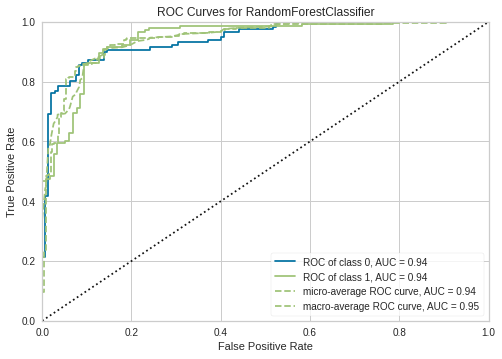

In [22]:
plot_model(tuned_rf, plot = 'auc')

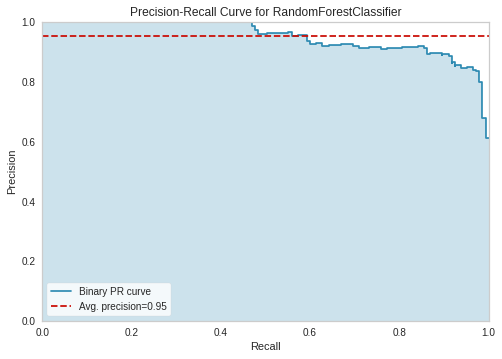

In [23]:
plot_model(tuned_rf, plot = 'pr')

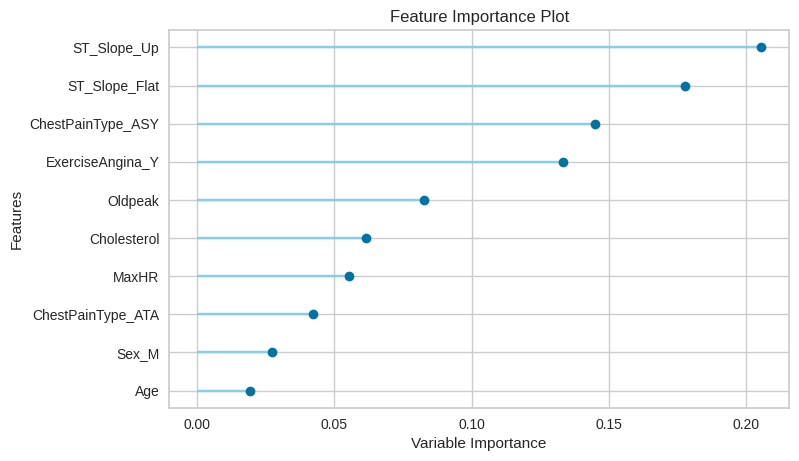

In [24]:
plot_model(tuned_rf, plot='feature')

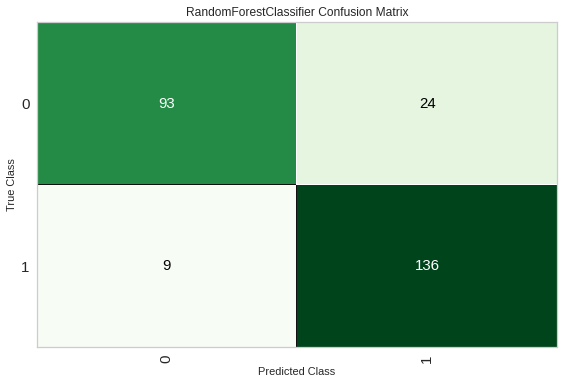

In [25]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [26]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.874,0.9431,0.9379,0.85,0.8918,0.742,0.7471


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease,Label,Score
0,0.833333,0.610,0.358209,0.112782,0.295455,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0.8769
1,-0.020833,0.650,0.218905,0.872181,0.295455,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9269
2,0.166667,0.650,0.349917,0.548872,0.295455,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9288
3,0.354167,0.505,0.326700,0.654135,0.295455,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9289
4,0.458333,0.650,0.424544,0.601504,0.352273,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.500000,0.600,0.300166,0.473684,0.295455,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9488
258,0.687500,0.790,0.348259,0.323308,0.636364,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,1,0.8691
259,0.750000,0.670,0.000000,0.323308,0.420455,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.9124
260,0.687500,0.690,0.487562,0.278196,0.511364,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.7334


In [28]:
final_rf = finalize_model(tuned_rf)

In [29]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [30]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9084,0.9581,0.9586,0.8854,0.9205,0.8128,0.8164


In [31]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.913,0.9295,0.92,0.92,0.92,0.8248,0.8248


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Label,Score
0,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0,0.9238
1,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat,0,0,0.5245
2,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0,0,0.8595
3,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0,0,0.7642
4,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1,1,0.9033


In [32]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['HeartDisease'], unseen_predictions['Label'], metric = 'Accuracy')

0.913

In [33]:
save_model(final_rf,'Final RF Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='HeartDisease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
              

In [34]:
saved_final_rf = load_model('Final RF Model')

Transformation Pipeline and Model Successfully Loaded


In [35]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.913,0.9295,0.92,0.92,0.92,0.8248,0.8248


In [36]:
from pycaret.utils import check_metric
check_metric(new_prediction['HeartDisease'], new_prediction['Label'], metric = 'Accuracy')

0.913